<a href="https://colab.research.google.com/github/EtienneNoir/Deep_Learning/blob/main/IntroductionToDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential # to be able to create a sequential network
from tensorflow.keras.layers import Dense, Rescaling # for rescalling and adding more layers to the model
from tensorflow.keras.datasets import mnist # retrieving the dataset
from tensorflow.keras.utils import to_categorical
# Definition of the above import :
#  - one hot encoding takes the categorical data, output data, identifies and seperates the different classes and then specify
#  - which input or observation was specified to be any of the categories.
#  - So it classifies using binaries 1's and 0's instead of using labels
#  - Which is a format that the machine can understand and classify
from tensorflow.keras.layers.experimental.preprocessing import Normalization

(x_train, y_train), (x_test, y_test) = mnist.load_data(path="mnist.npz") # defining from where the dataset will be retrived from since it not stored locally

#Flattening the 28 by 28 pixals into 784 pixals.
x_train = x_train.reshape((x_train.shape[0], 784)) # each input neuron in teh first layer (50) will receive the same input but have different weights to try and unciver a pattern from them
x_test = x_test.reshape((x_test.shape[0], 784))


# One-hot encode the labels, to identify the different outputs and convert them into values that can be used to classify an inputs
y_train = to_categorical(y_train) # the output is one hot encoded
y_test = to_categorical(y_test)

# normalizing the input values, ensuring that the pixel values fall within the same range, a range that makes easier for the model to understand
normalizer = Normalization()
x_train = normalizer(x_train)
x_test = normalizer(x_test)

# Creating the network :

# Create the model: model
model = Sequential()
# Adding the first hidden layer
model.add(Dense(50, activation='relu', input_shape = (784,)))
# Adding the second hidden layer, neurons are used to aggregate patterns that can be used to put together an image that can be used for predictions
model.add(Dense(50, activation='relu'))
# adding an output layer
model.add(Dense(10, activation='softmax')) # Last layer has 10 neurons because there are 10 possible options or classes that an input can be

# Compiling the model
# Using adam as an optimiser to adjust the weights and find the best optimal weights
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
model.fit(x_train, y_train, validation_split=0.3, epochs=10 )
# validation of 0.3 is used to say that 70 percent of the training data will be used to train the model and adjust its weights to improve its performance and 30 percent will be used to just test the model here after it has been adjusted in this epoch

# Evaluating the model
test_loss, test_accuracy  = model.evaluate(x_test, y_test) # evaluating the model, testing the model after it has been adjusted to see how well it is able to predict on unseen data
# Giving the model the memo and the unseen questions to see how many of the questions it got right in based on the answers given on the memo


Epoch 1/10
1313/1313 [==============================] - 7s 5ms/step - loss: 2.2399 - accuracy: 0.7893 - val_loss: 0.5578 - val_accuracy: 0.8718
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4581 - accuracy: 0.8873 - val_loss: 0.4063 - val_accuracy: 0.9048
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3532 - accuracy: 0.9099 - val_loss: 0.3665 - val_accuracy: 0.9166
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3024 - accuracy: 0.9233 - val_loss: 0.4019 - val_accuracy: 0.9034
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2602 - accuracy: 0.9318 - val_loss: 0.2711 - val_accuracy: 0.9328
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2419 - accuracy: 0.9385 - val_loss: 0.2736 - val_accuracy: 0.9312
Epoch 7/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2048 - accuracy: 0.9455 - val_loss: 0.2380 - val_accuracy:

In [ ]:
print(f"Test loss: {test_loss * 100}") # difference or distance between the predictions and the actual answer
print(f"Test accuracy: {(test_accuracy * 100):.2f}%") # .2f for two decimal places

Test loss: 28.568044304847717
Test accuracy: 93.46%


1/1 [==============================] - 0s 32ms/step
Predicted class: 4


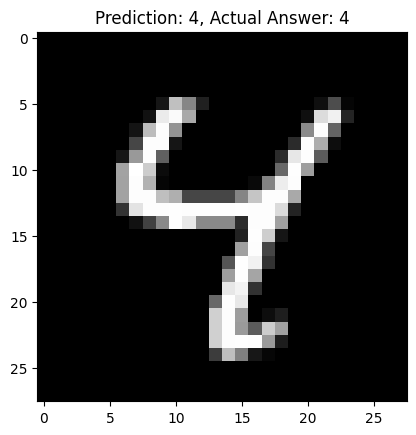

In [ ]:
# making a prediction on a single image:
# Image has already been rescaled
# Keep working on chapter 4 and work on different datasets
import numpy as np # Importing numpy for numbers manipulation and quick calculations
import matplotlib.pyplot as plt # for visualization

(x_train2, y_train2), (x_test2, y_test2) = mnist.load_data(path="mnist.npz") # Importing mnist again to use differnt data to test the created model


singleImage = x_test2[6] # extracting an image from the dataset

singleIamgeAnswer = y_test[6] # extracting the answer for the image

#predicting the single Image: reshaping it so that it can be fed to the machine (into the correct input format)
single_image = singleImage.reshape(1, 784)  # Reshape to match input shape, flatting the 28 by 28 image to 784 as one array

predicted_probabilities = model.predict(single_image) # predicting what the image is

predicted_class = np.argmax(predicted_probabilities) # returns the class with the highest probability that the input is classified as

print(f"Predicted class: {predicted_class}") # printing the extracted class



plt.imshow(single_image.reshape(28, 28), cmap='gray') # Reshape back to 28x28 pixel image so that it can be displayed in its original format as a gray-scale
plt.title(f"Prediction: {predicted_class}, Actual Answer: {np.argmax(singleIamgeAnswer)}") # Showing that the prediction is equal to the given answer
plt.show() # used to show the canvas

